<a href="https://colab.research.google.com/github/Clinda02/financial_data_analysis/blob/main/fdr_volume_mass_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 주가 데이터 분석
* [FinanceDataReader 개요](https://github.com/FinanceData/FinanceDataReader#quick-start)

* 지원하는 거래소:
  - KRX(한국거래소),
  - NYSE(뉴욕증권거래소),
  - NASDAQ(나스닥),
  - AMEX(아멕스),
  - SSE(상해),
  - SZSE(심천),
  - HKEX(홍콩),
  - TSE(도쿄)

---
* 참고영상 : [거래량으로 투자하라](https://www.youtube.com/watch?v=K51WTYVoI0w)

## 환경세팅

In [ ]:
#설치
!pip install finance-datareader

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.3/89.3 kB 2.2 MB/s eta 0:00:00


In [ ]:
# (라이브러리 설치 후 런타임 재시작 필요)
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 4s (2,829 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 123622 files and dire

In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

# 한글 폰트(나눔고딕)을 기본 폰트로 사용하도록 설정
plt.rcParams["font.family"] = 'NanumGothic'

# 그래프에서 마이너스 폰트 깨지는 문제해결
mpl.rcParams['axes.unicode_minus'] = False

## 데이터 수집

In [ ]:
import FinanceDataReader as fdr

sp500 = fdr.StockListing('S&P500')
sp500.head(10)

,Symbol,Name,Sector,Industry
0,MMM,3M,Industrials,Industrial Conglomerates
1,AOS,A. O. Smith,Industrials,Building Products
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment
3,ABBV,AbbVie,Health Care,Biotechnology
4,ACN,Accenture,Information Technology,IT Consulting & Other Services
5,ADBE,Adobe Inc.,Information Technology,Application Software
6,AMD,Advanced Micro Devices,Information Technology,Semiconductors
7,AES,AES Corporation,Utilities,Independent Power Producers & Energy Traders
8,AFL,Aflac,Financials,Life & Health Insurance
9,A,Agilent Technologies,Health Care,Life Sciences Tools & Services


In [ ]:
import FinanceDataReader as fdr

start_date = "2024-01-01"
end_date = "2024-10-23"
ticker = "005930"

# ticker(종목)에 해당하는 주가 데이터 로딩
df = fdr.DataReader(ticker, start_date, end_date)
df.head()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2024-01-02,78200,79800,78200,79600,17142847,0.014013
2024-01-03,78500,78800,77000,77000,21753644,-0.032663
2024-01-04,76100,77300,76100,76600,15324439,-0.005195
2024-01-05,76700,77100,76400,76600,11304316,0.000000
2024-01-08,77000,77500,76400,76500,11088724,-0.001305


## 데이터 가공

In [ ]:
# Channge(주가 변화율) 컬럼이 없는 경우, 생성
# 주가 변화율 = 전일 대비 수정종가(Adj Close) 변화량 / 금일 수정종가(Adj Close)
if 'Change' not in df.columns:
    df['Change'] = df['Adj Close'].diff() / df['Adj Close']

# 주가의 질량 = 거래량 / 주가변화율
df['Mass'] = df['Volume'] / ((df['Close']+0.1) * 100) # Close가 0인 경우 대비 +0.1연산
df['Weight'] = df['Mass'] / 10000

# 거래량 변화량
df['Volume_Change'] = df['Volume'].diff()

df.head()

,Open,High,Low,Close,Volume,Change,Mass,Weight,Volume_Change
Date,,,,,,,,,
2024-01-02,78200,79800,78200,79600,17142847,0.014013,2.153621,0.000215,NaN
2024-01-03,78500,78800,77000,77000,21753644,-0.032663,2.825145,0.000283,4610797.0
2024-01-04,76100,77300,76100,76600,15324439,-0.005195,2.000577,0.000200,-6429205.0
2024-01-05,76700,77100,76400,76600,11304316,0.000000,1.475757,0.000148,-4020123.0
2024-01-08,77000,77500,76400,76500,11088724,-0.001305,1.449505,0.000145,-215592.0


- 거래량이 전날 대비 1만 증가하더라도, '거래량 증가'라고 판단하게 됨.
- 책의 저자가 '거래량이 증가했다' 뜻하는 바는 평소 대비 엄청난 거래량(예, 기관, 외국인 등) 이 발생했음을 의미하므로, 다른식으로 거래량이 증가함을 판단해야 함.
- 최근 20일 기준 평균값 대비 금일 거래량이 증가했다면 거래량이 늘어났다고 판단하겠음

In [ ]:
df['Volume_Change'] = df['Volume'] - df['Volume'].rolling(20).median()
df.head(30)

,Open,High,Low,Close,Volume,Change,Mass,Weight,Volume_Change
Date,,,,,,,,,
2024-01-02,78200,79800,78200,79600,17142847,0.014013,2.153621,0.000215,NaN
2024-01-03,78500,78800,77000,77000,21753644,-0.032663,2.825145,0.000283,NaN
2024-01-04,76100,77300,76100,76600,15324439,-0.005195,2.000577,0.000200,NaN
2024-01-05,76700,77100,76400,76600,11304316,0.000000,1.475757,0.000148,NaN
2024-01-08,77000,77500,76400,76500,11088724,-0.001305,1.449505,0.000145,NaN
2024-01-09,77400,77700,74300,74700,26019249,-0.023529,3.483161,0.000348,NaN
2024-01-10,75000,75200,73200,73600,20259529,-0.014726,2.752650,0.000275,NaN
2024-01-11,72900,73600,72700,73200,57691266,-0.005435,7.881310,0.000788,NaN
2024-01-12,73000,74100,72800,73100,13038939,-0.001366,1.783710,0.000178,NaN


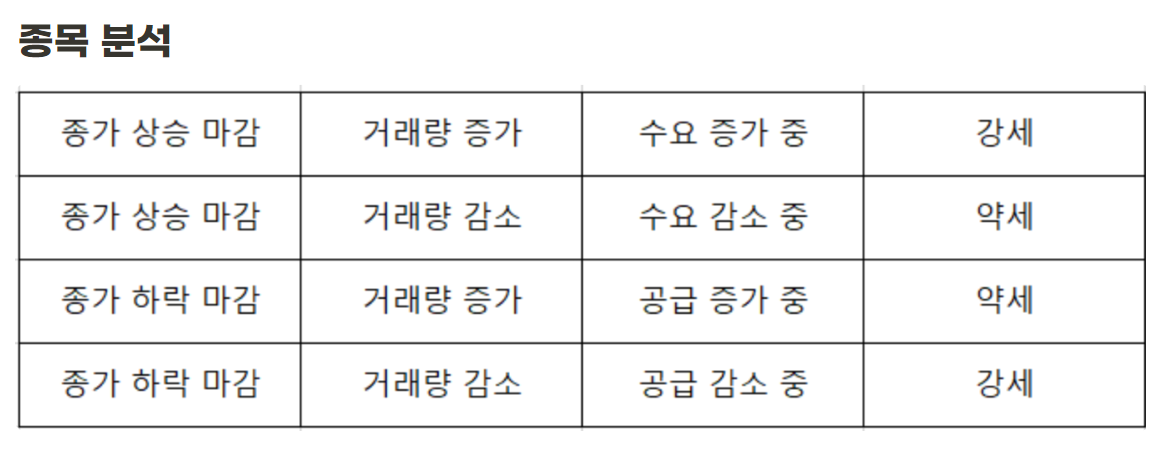

[ToDo] 종가 상승/하락 여부를 시가(Open)와 종가(Close)의 단순 수치비교로 판단했으나, 시가와 종가의 차이(예. 시가 대비 종가가 X% 증가한 경우를 "상승마감"으로, Y% 하락한 경우를 "종가 하락 마감"으로 판단)

In [ ]:
def get_demand_status(dataframe):
    open, close, volume_change = dataframe['Open'], dataframe['Close'], dataframe['Volume_Change']
    result1, result2 = '', ''
    close_change = close - open
    if close_change > 0 and volume_change > 0:
        result1 = '수요 증가 중'
        result2 = '강세'
    elif close_change > 0 and volume_change <= 0:
        result1 = '수요 감소 중'
        result2 = '약세'
    elif close_change <= 0 and volume_change > 0:
        result1 = '공급 증가 중'
        result2 = '약세'
    elif close_change <= 0 and volume_change <= 0:
        result1 = '공급 감소 중'
        result2 = '강세'
    return result1, result2

In [ ]:
# 수요, 강도를 계산하여 신규 컬럼 생성
df['demand'], df['strength'] = zip(*df.apply(get_demand_status, axis=1))

# 2024년 7월 이후의 데이터만 추출
df_sub = df[(df.index.year == 2024) & (df.index.month >= 7)].copy()
df_sub.head()

,Open,High,Low,Close,Volume,Change,Mass,Weight,Volume_Change,demand,strength
Date,,,,,,,,,,,
2024-07-01,81500,82100,81300,81800,11317202,0.003681,1.383519,0.000138,1861273.0,수요 증가 중,강세
2024-07-02,82500,82600,81500,81800,14471904,0.000000,1.769179,0.000177,3154702.0,공급 증가 중,약세
2024-07-03,82300,82300,81000,81800,11440328,0.000000,1.398571,0.000140,-3031576.0,공급 감소 중,강세
2024-07-04,82900,84700,82400,84600,43857229,0.034230,5.184063,0.000518,32416901.0,수요 증가 중,강세
2024-07-05,85600,87100,85200,87100,45791193,0.029551,5.257307,0.000526,1933964.0,수요 증가 중,강세


## 데이터 시각화

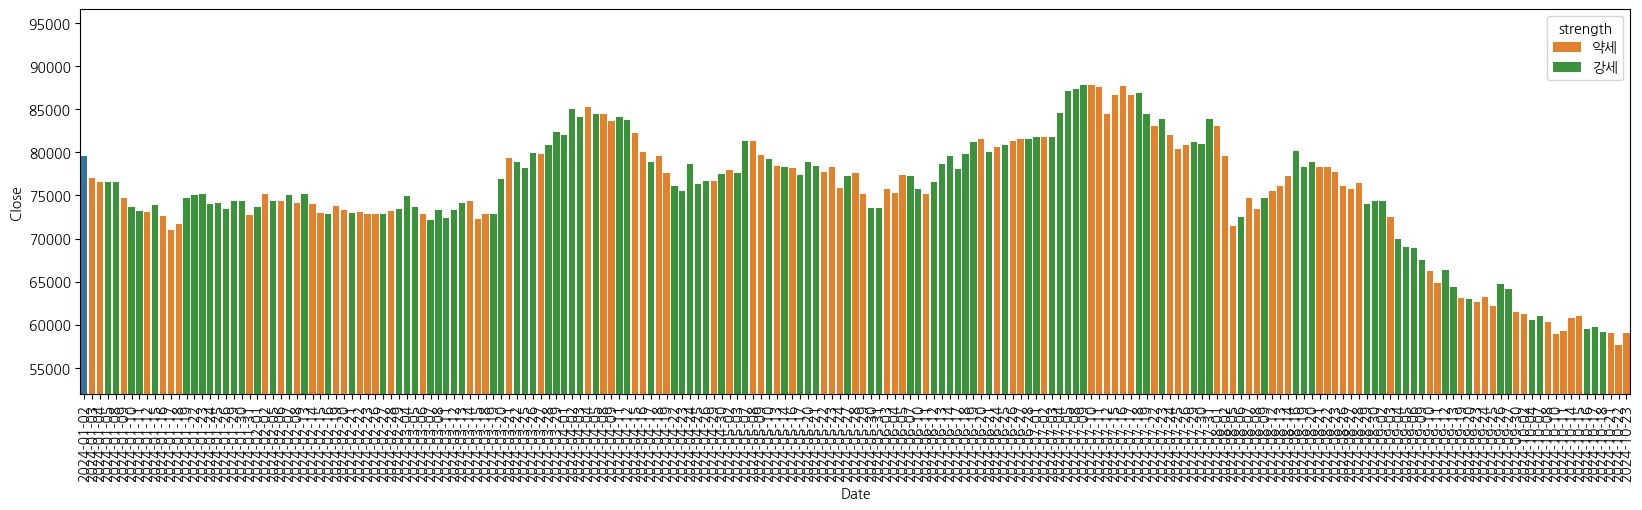

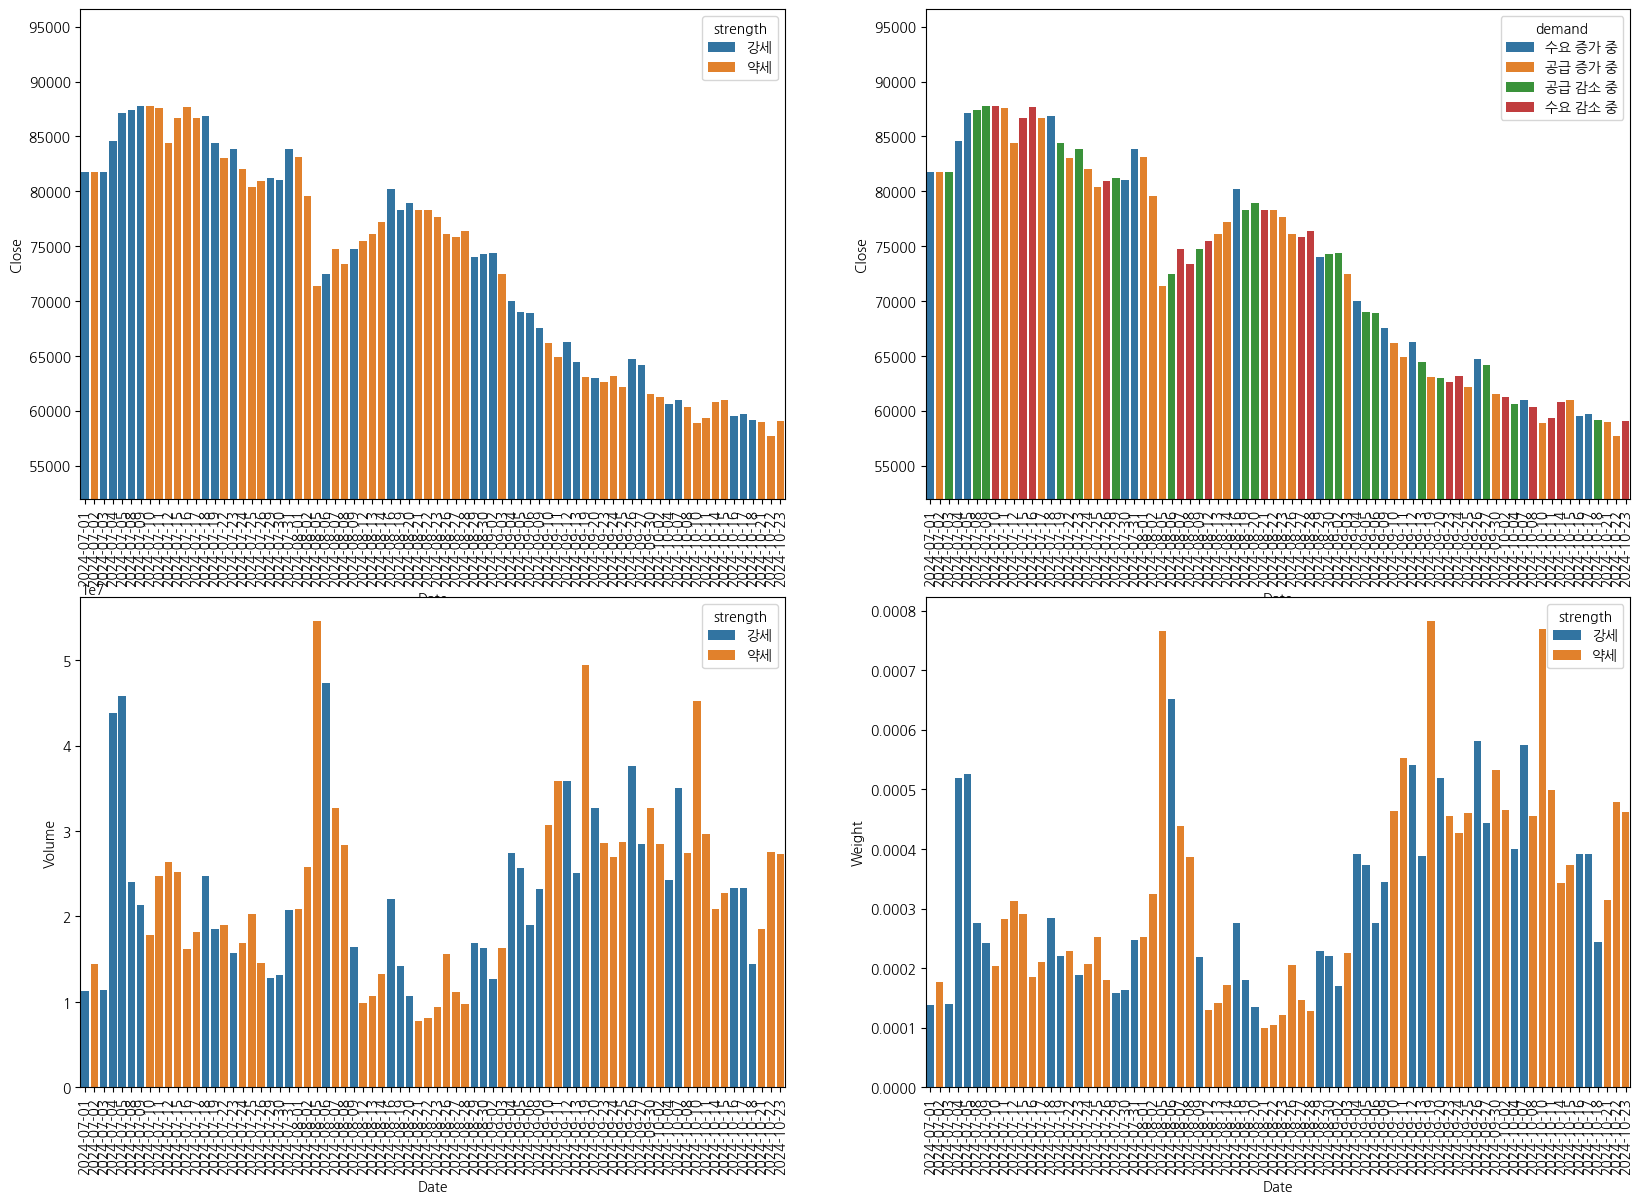

In [ ]:
# 1x1 서브플롯 생성
# 2024-01-01 이후 데이터
fig, ax = plt.subplots(nrows = 1, ncols=1)
fig.set_size_inches(20,5)

ylim_min = round(df['Close'].min()*0.9, -1) # 최솟값 -10% , 10의 단위 반올림
ylim_max = round(df['Close'].max()*1.1, -1) # 최댓값 +10% , 10의 단위 반올림

# 종가 대비 강세/약세 시각화
plt.subplot(1, 1, 1)
sns.barplot(x= df.index, y = df['Close'], hue = df['strength']).set(ylim=(ylim_min, ylim_max))
plt.xticks(rotation = 90)

# 2x2 서브플롯 생성
# 2024-07-01 이후 데이터
fig, ax = plt.subplots(nrows = 2, ncols=2)
fig.set_size_inches(20,14)

ylim_min = round(df_sub['Close'].min()*0.9, -1)
ylim_max = round(df_sub['Close'].max()*1.1, -1)

# 종가 대비 강세/약세 시각화
plt.subplot(2, 2, 1)
sns.barplot(x= df_sub.index, y = df_sub['Close'], hue = df_sub['strength']).set(ylim=(ylim_min, ylim_max))
plt.xticks(rotation = 90)

# 공급/수요 대비 강세/약세 시각화
plt.subplot(2, 2, 2)
sns.barplot(x= df_sub.index, y = df_sub['Close'], hue = df_sub['demand']).set(ylim=(ylim_min, ylim_max))
plt.xticks(rotation = 90)

# 주가질량 대비 강세/약세 시각화
plt.subplot(2, 2, 3)
sns.barplot(x= df_sub.index, y = df_sub['Volume'], hue = df_sub['strength'])
plt.xticks(rotation = 90)

# 주가무게 대비 강세/약세 시각화
plt.subplot(2, 2, 4)
sns.barplot(x= df_sub.index, y = df_sub['Weight'], hue = df_sub['strength'])
plt.xticks(rotation = 90)
plt.show()


**and 기업 주가 분석**

* 2019년 수익률 1위 : AMD(에이엠디) - 그래픽카드, 집적회로 제조사

In [ ]:
# AMD 분석
start_date = "2024-01-01"
end_date = "2024-10-23"
ticker= "AMD"

amd = fdr.DataReader(ticker, start_date, end_date)
amd.head()

,Open,High,Low,Close,Volume,Adj Close
2024-01-02,144.279999,144.399994,137.429993,138.580002,64902000,138.580002
2024-01-03,135.710007,137.429993,133.740005,135.320007,61988600,135.320007
2024-01-04,134.300003,137.699997,134.000000,136.009995,58610300,136.009995
2024-01-05,136.779999,141.009995,136.440002,138.580002,69595000,138.580002
2024-01-08,140.360001,147.149994,140.149994,146.179993,71756900,146.179993


In [ ]:
import pandas as pd
import numpy as np

if 'Change' not in amd.columns:
  amd['Change'] = amd['Adj Close'].diff() / amd['Adj Close']

amd['Mass'] = amd['Volume'] / (amd['Change']+0.1) *100
amd['Weight'] = amd['Mass'] / 10000

amd.head()

,Open,High,Low,Close,Volume,Adj Close,Change,Mass,Weight
2024-01-02,144.279999,144.399994,137.429993,138.580002,64902000,138.580002,NaN,NaN,NaN
2024-01-03,135.710007,137.429993,133.740005,135.320007,61988600,135.320007,-0.024091,8.166173e+10,8.166173e+06
2024-01-04,134.300003,137.699997,134.000000,136.009995,58610300,136.009995,0.005073,5.578052e+10,5.578052e+06
2024-01-05,136.779999,141.009995,136.440002,138.580002,69595000,138.580002,0.018545,5.870752e+10,5.870752e+06
2024-01-08,140.360001,147.149994,140.149994,146.179993,71756900,146.179993,0.051991,4.721140e+10,4.721140e+06


In [ ]:
amd['Volume_Change'] = amd['Volume']-amd['Volume'].rolling(20).mean()
amd.head(30)

NameError: name 'amd' is not defined

In [ ]:
def get_demand_strength(row):
  open, close, volume_change = row['Open'], row['Close'], row['Volume_Change']
  result1, result2 = '', ''
  close_change = close - open
  if close_change > 0 and volume_change > 0:
    result1 = '수요 증가 중'
    result2 = '강세'
  elif close_change > 0 and volume_change < 0:
    result1 = '수요 감소 중'
    result2 = '약세'
  elif close_change < 0 and volume_change > 0:
    result1 = '공급 증가 중'
    result2 = '약세'
  elif close_change < 0 and volume_change < 0:
    result1 = '공급 감소 중'
    result2 = '강세'
  return result1, result2

amd['demand'], amd['strength'] = zip(*amd.apply(get_demand_strength, axis=1))
amd.head(30)

,Open,High,Low,Close,Volume,Adj Close,Change,Mass,Weight,Volume_Change,demand,strength
2024-01-02,144.279999,144.399994,137.429993,138.580002,64902000,138.580002,NaN,NaN,NaN,NaN,,
2024-01-03,135.710007,137.429993,133.740005,135.320007,61988600,135.320007,-0.024091,8.166173e+10,8.166173e+06,NaN,,
2024-01-04,134.300003,137.699997,134.000000,136.009995,58610300,136.009995,0.005073,5.578052e+10,5.578052e+06,NaN,,
2024-01-05,136.779999,141.009995,136.440002,138.580002,69595000,138.580002,0.018545,5.870752e+10,5.870752e+06,NaN,,
2024-01-08,140.360001,147.149994,140.149994,146.179993,71756900,146.179993,0.051991,4.721140e+10,4.721140e+06,NaN,,
2024-01-09,145.949997,149.860001,145.080002,149.259995,67875700,149.259995,0.020635,5.626528e+10,5.626528e+06,NaN,,
2024-01-10,150.070007,150.880005,146.649994,148.539993,56951200,148.539993,-0.004847,5.985236e+10,5.985236e+06,NaN,,
2024-01-11,148.520004,150.380005,143.690002,148.020004,62764600,148.020004,-0.003513,6.504978e+10,6.504978e+06,NaN,,
2024-01-12,148.039993,148.750000,145.000000,146.559998,48250800,146.559998,-0.009962,5.358928e+10,5.358928e+06,NaN,,
2024-01-16,150.360001,159.720001,149.979996,158.740005,112711400,158.740005,0.076729,6.377630e+10,6.377630e+06,NaN,,


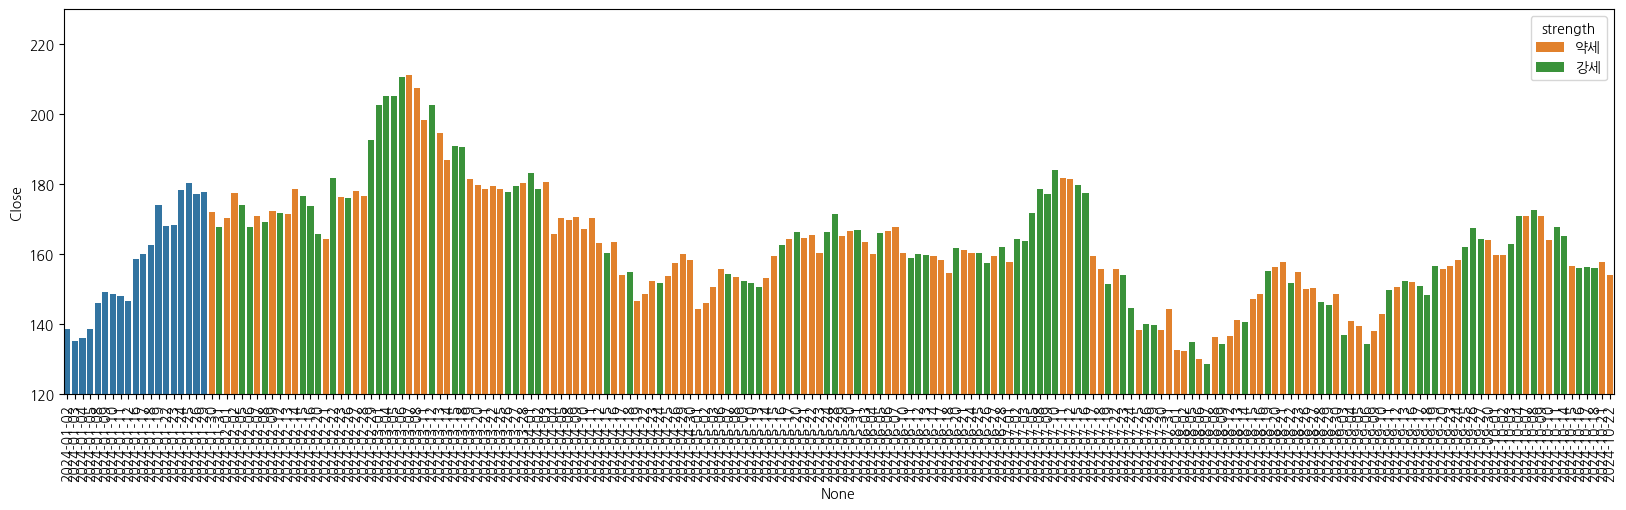

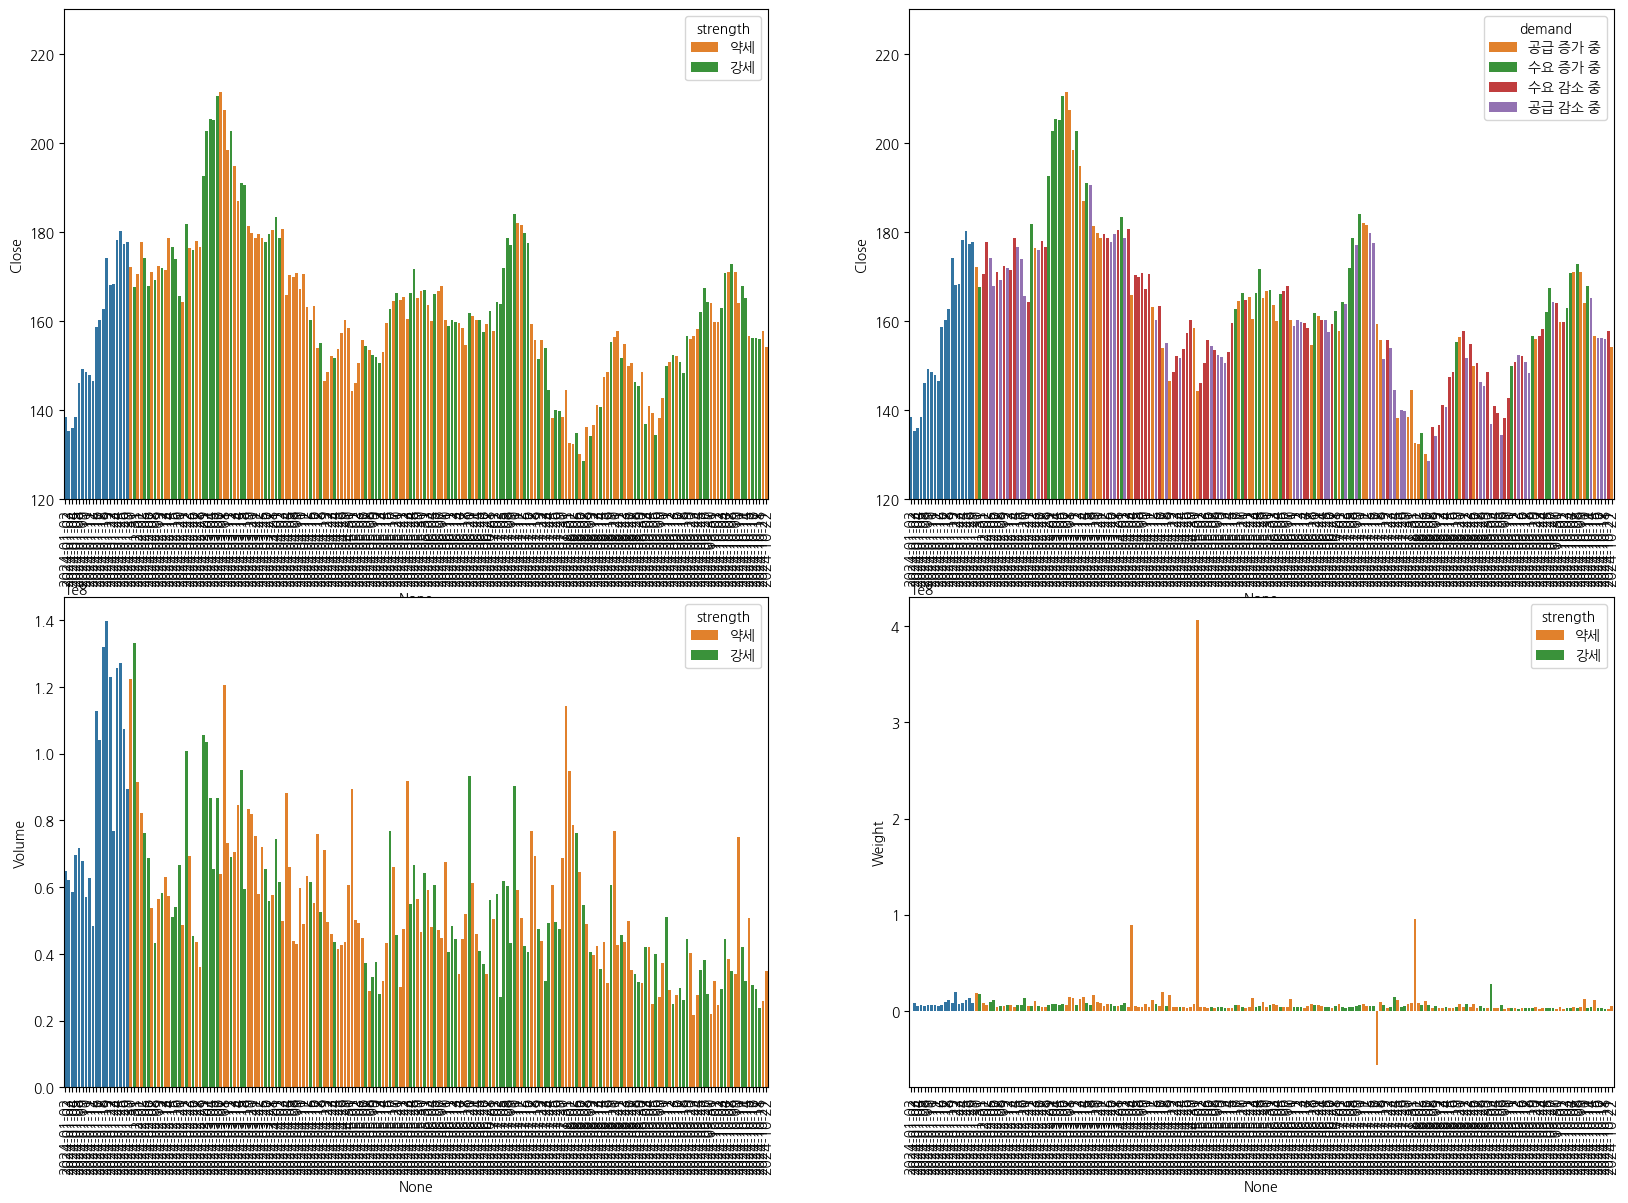

In [ ]:
# 1x1 서브플롯 생성
# 2024-01-01 이후 데이터
fig, ax = plt.subplots(nrows = 1, ncols=1)
fig.set_size_inches(20,5)

ylim_min = round(amd['Close'].min()*0.9, -1) # 최솟값 -10% , 10의 단위 반올림
ylim_max = round(amd['Close'].max()*1.1, -1) # 최댓값 +10% , 10의 단위 반올림

# 종가 대비 강세/약세 시각화
plt.subplot(1, 1, 1)
sns.barplot(x= amd.index, y = amd['Close'], hue = amd['strength']).set(ylim=(ylim_min, ylim_max))
plt.xticks(rotation = 90)

# 2x2 서브플롯 생성
# 2024-07-01 이후 데이터
fig, ax = plt.subplots(nrows = 2, ncols=2)
fig.set_size_inches(20,14)

ylim_min = round(amd['Close'].min()*0.9, -1)
ylim_max = round(amd['Close'].max()*1.1, -1)

# 종가 대비 강세/약세 시각화
plt.subplot(2, 2, 1)
sns.barplot(x= amd.index, y = amd['Close'], hue = amd['strength']).set(ylim=(ylim_min, ylim_max))
plt.xticks(rotation = 90)

# 공급/수요 대비 강세/약세 시각화
plt.subplot(2, 2, 2)
sns.barplot(x= amd.index, y = amd['Close'], hue = amd['demand']).set(ylim=(ylim_min, ylim_max))
plt.xticks(rotation = 90)

# 주가질량 대비 강세/약세 시각화
plt.subplot(2, 2, 3)
sns.barplot(x= amd.index, y = amd['Volume'], hue = amd['strength'])
plt.xticks(rotation = 90)

# 주가무게 대비 강세/약세 시각화
plt.subplot(2, 2, 4)
sns.barplot(x= amd.index, y = amd['Weight'], hue = amd['strength'])
plt.xticks(rotation = 90)
plt.show()
